# Disease prediction

## 2.0 - EDA uppvärmning


In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [4]:
Cardio = pd.read_csv('Data/cardio_train.csv', sep=';') #delete semicolon using 'sep' based on:https://www.geeksforgeeks.org/python-sep-parameter-print/
Cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


- a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [7]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
cardio_count= Cardio.cardio.value_counts()
print(f'Number of positive cases for cardiovascular disease : {cardio_count[1]}')
print(f'Number of negative cases for cardiovascular disease : {cardio_count[0]}')

Number of positive cases for cardiovascular disease : 34979
Number of negative cases for cardiovascular disease : 35021


- b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

In [14]:
Cardio["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

Text(0.5, 1.0, 'kolesterolvärde')

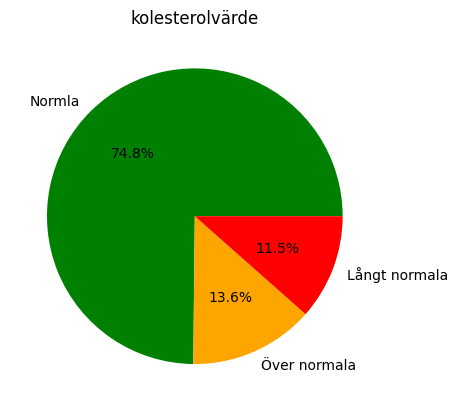

In [18]:
plt.pie(Cardio['cholesterol'].value_counts(), labels=["Normla", "Över normala", "Långt normala"], autopct="%1.1f%%", colors=["green", "orange", "red"])
plt.title('kolesterolvärde')

- c) Hur ser åldersfördelningen ut? Rita ett histogram.


<AxesSubplot:xlabel='Age', ylabel='Count'>

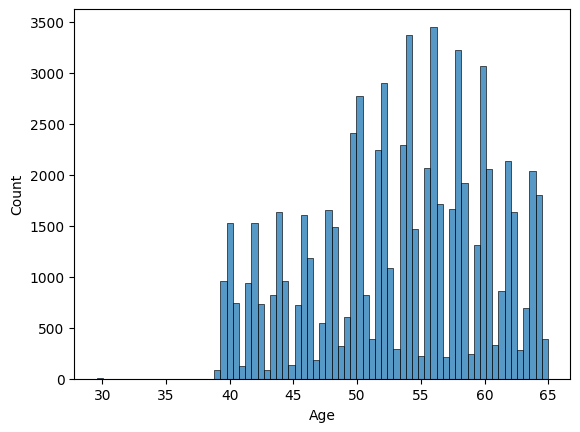

In [27]:
# age column is given in days so I need to convert it in years using pd
Age= pd.DataFrame({"Age": Cardio["age"]/365})
sns.histplot(Age["Age"])

- d) Hur stor andel röker?

In [29]:
Smokers= (Cardio["smoke"].value_counts()[1])
Smokers

6169

In [33]:
#get percentage
Smokers_andel=(Smokers/Cardio["smoke"].count())*100
print(f'Smokers are {Smokers_andel} % of the total.')

Smokers are 8.812857142857142 % of the total.


- e) Hur ser viktfördelningen ut? Rita lämpligt diagram.

Text(0.5, 1.0, 'Viktfördelningen')

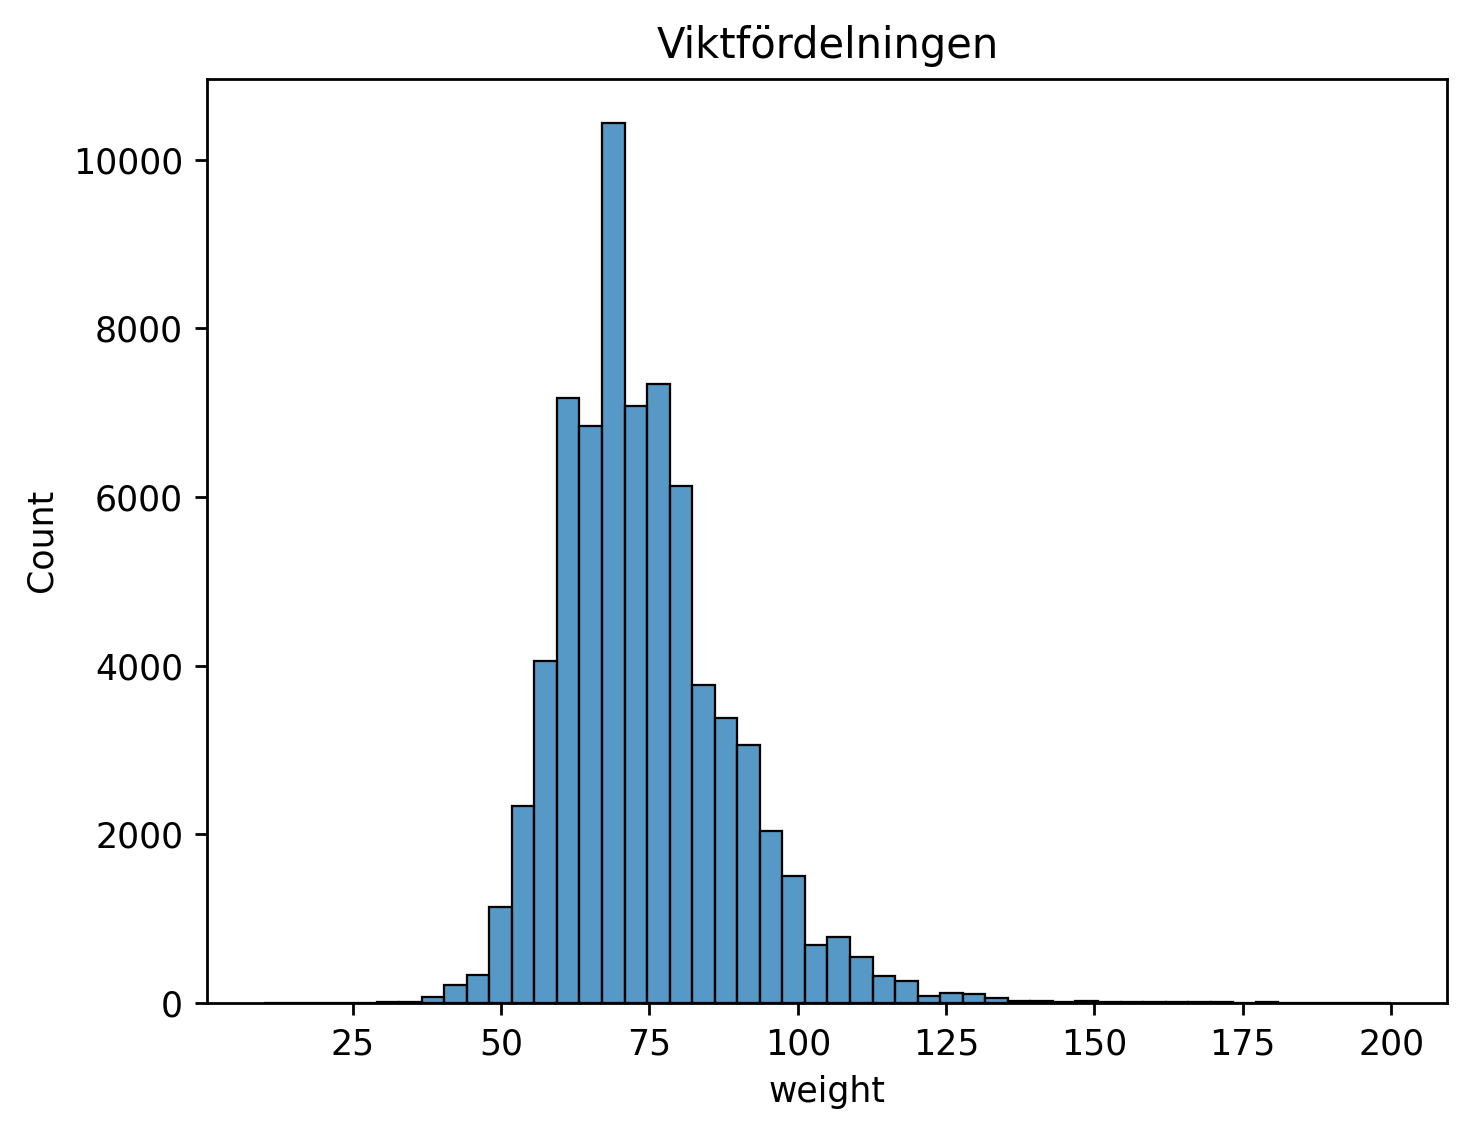

In [44]:
plt.figure(dpi=250)
sns.histplot(Cardio["weight"], bins=50)
plt.title("Viktfördelningen")


- f) Hur ser längdfördelningen ut? Rita lämpligt diagram.

Text(0.5, 1.0, 'Längdfördelningen')

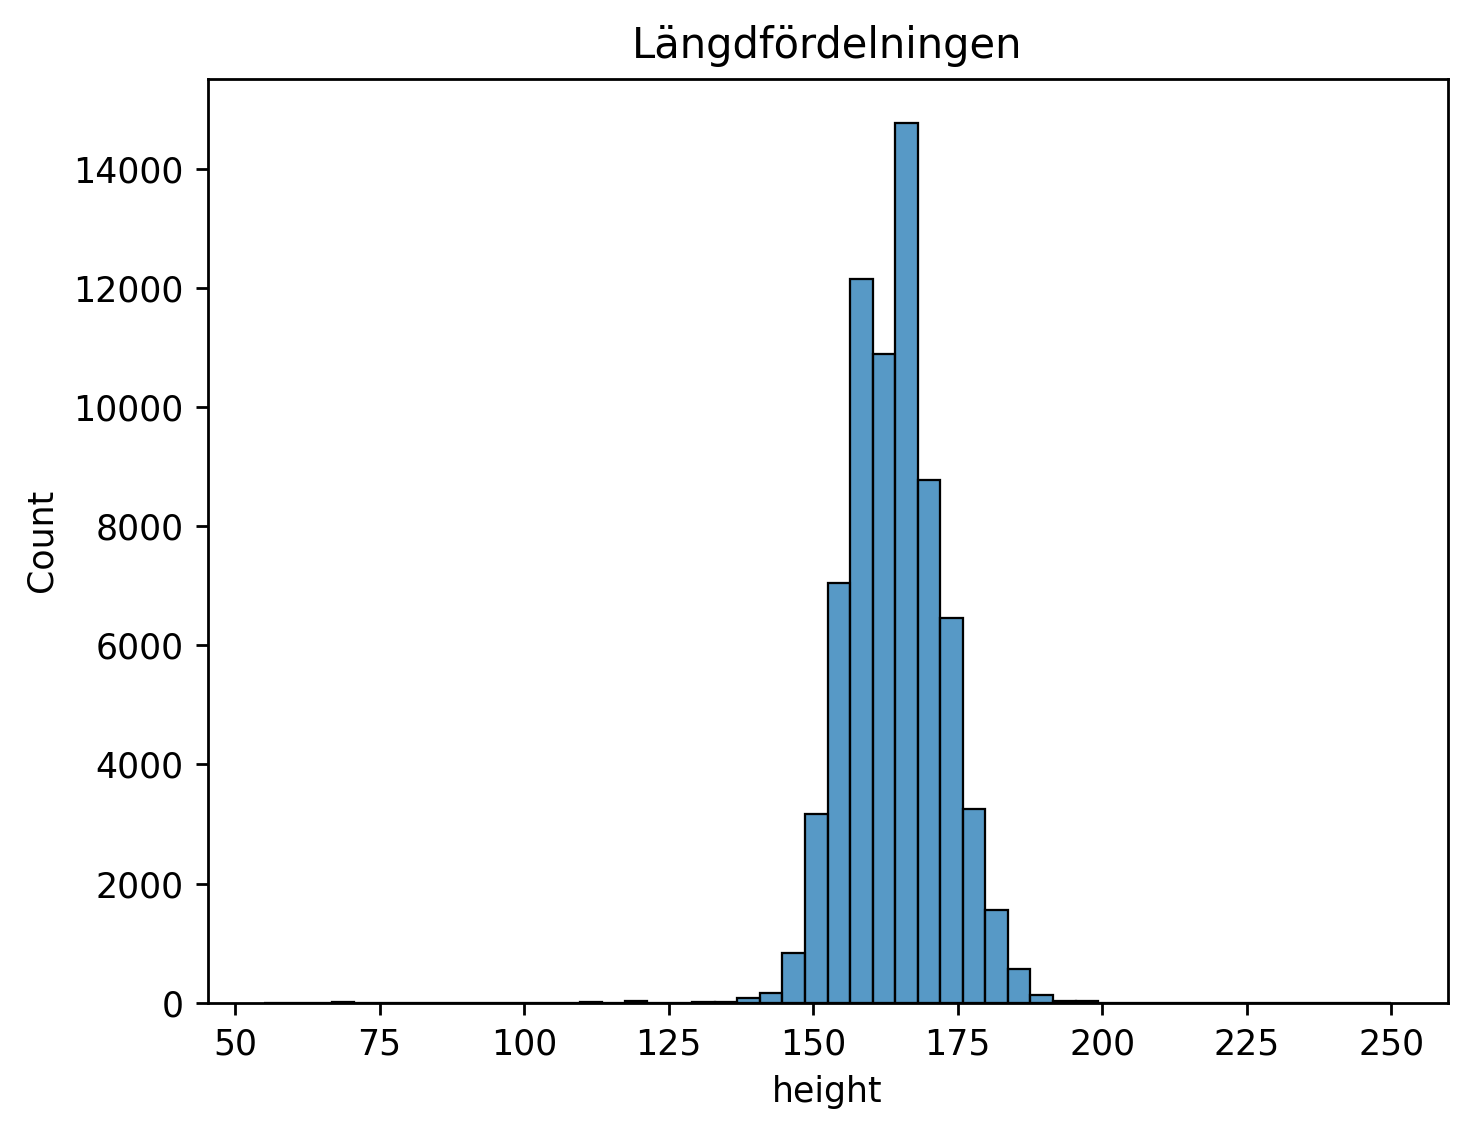

In [45]:
plt.figure(dpi=250)
sns.histplot(Cardio["height"], bins=50)
plt.title("Längdfördelningen")

- g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram


Text(0.5, 1.0, 'könfördelning')

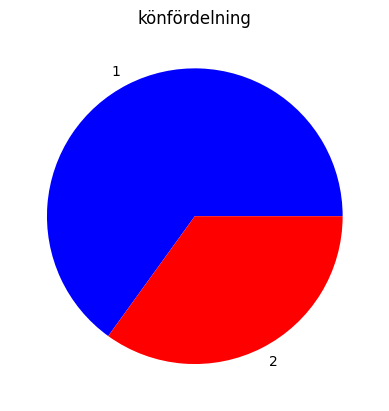

In [32]:
plt.pie(Cardio['gender'].value_counts(), labels=["1", "2"], colors=["blue", "red"])
plt.title('könfördelning')